In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

In [3]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



In [4]:
T = []
H = []
T0 = []
for i in range(3):
    T.append(xr.open_dataset('ERA5/T'+str(90-10*i))['t'])
    H.append(xr.open_dataset('ERA5/htr_inp'+str(90-10*i)+'.nc')['avg_ttpm']*86400)
    T0.append(pd.read_csv('T0.csv')[str(i)].values)

In [5]:
mp = pd.read_csv('model_to_p.csv')

In [6]:
H[0]

<xarray.DataArray 'avg_ttpm' (time: 120, level: 37)> Size: 36kB
array([[-8.45903229, -7.1665085 , -5.94825445, ..., -1.31014344,
        -0.3660796 ,  1.27488515],
       [-6.54684851, -6.74695545, -6.54532422, ..., -1.84125119,
        -1.99187912, -0.45536234],
       [-5.65996869, -6.12829685, -5.41252947, ..., -1.55596884,
        -1.3284235 ,  0.53917564],
       ...,
       [-6.85360774, -3.67074849, -2.50620545, ..., -1.63442174,
        -1.87173567, -0.57778905],
       [-4.55241346, -2.89671204, -2.06484863, ..., -1.82548614,
        -1.91501964,  0.37899612],
       [-7.69813044, -4.48929488, -2.64287439, ..., -1.30572465,
        -1.70134662, -0.3844842 ]])
Coordinates:
  * time     (time) datetime64[ns] 960B 2000-02-01 2000-03-01 ... 2010-01-01
  * level    (level) float64 296B 1.0 2.0 3.0 5.0 ... 925.0 950.0 975.0 1e+03

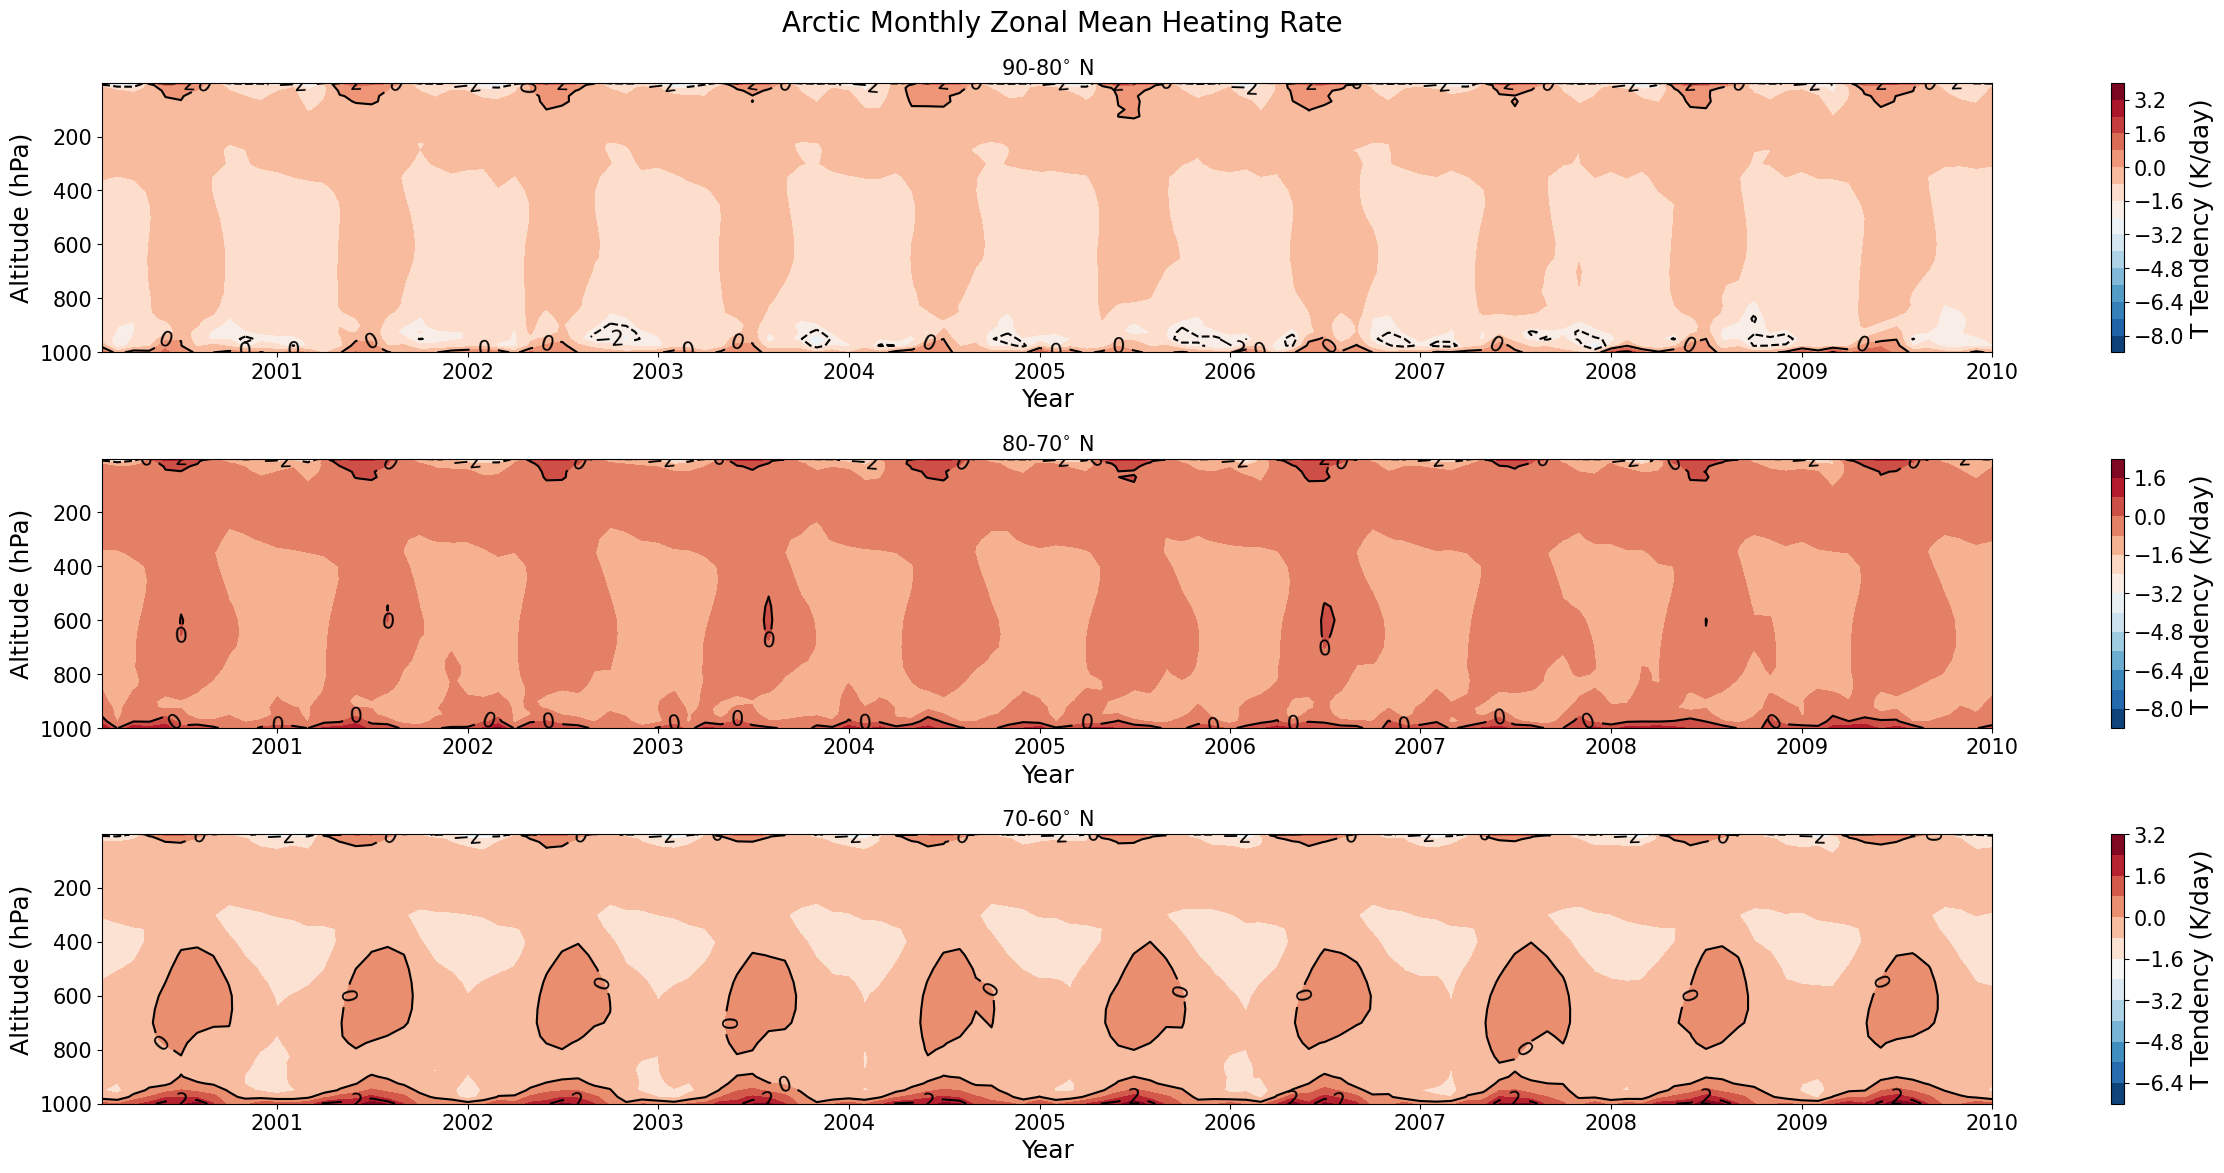

In [ ]:
fig, ax =  plt.subplots(3, 1, figsize=(25,12))

fig.suptitle('Arctic Monthly Zonal Mean Heating Rate', x=0.43)
for i in range(3):
    temp = H[i].sel(level='')
    cs = ax[i].contourf(H[i]['time'], H[i]['level'], H[i].transpose('level', 'time'), cmap='RdBu_r', levels = 15)
    cs2 = ax[i].contour(H[i]['time'], H[i]['level'], H[i].transpose('level', 'time'), levels=[-2,0,2], colors='black', linewidths=1.5)
    # ax[i].set_yscale('log')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='T Tendency (K/day)', ax=ax[i])
    #ax[i].set_ylim(1,1000)
    ax[i].clabel(cs2)
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_htr_decadal_lin.png', bbox_inches='tight')

In [7]:
H_og = []
month = [31,28,31,30,31,30,31,31,30,31,30,31]
for i in range(3):
    row = []
    for j in range(len(T[i][:119])):
        value = (T[i][j+1]-T[i][j])/month[j%12]
        row.append(value)
    H_og.append(row)     

We will try to connect these two

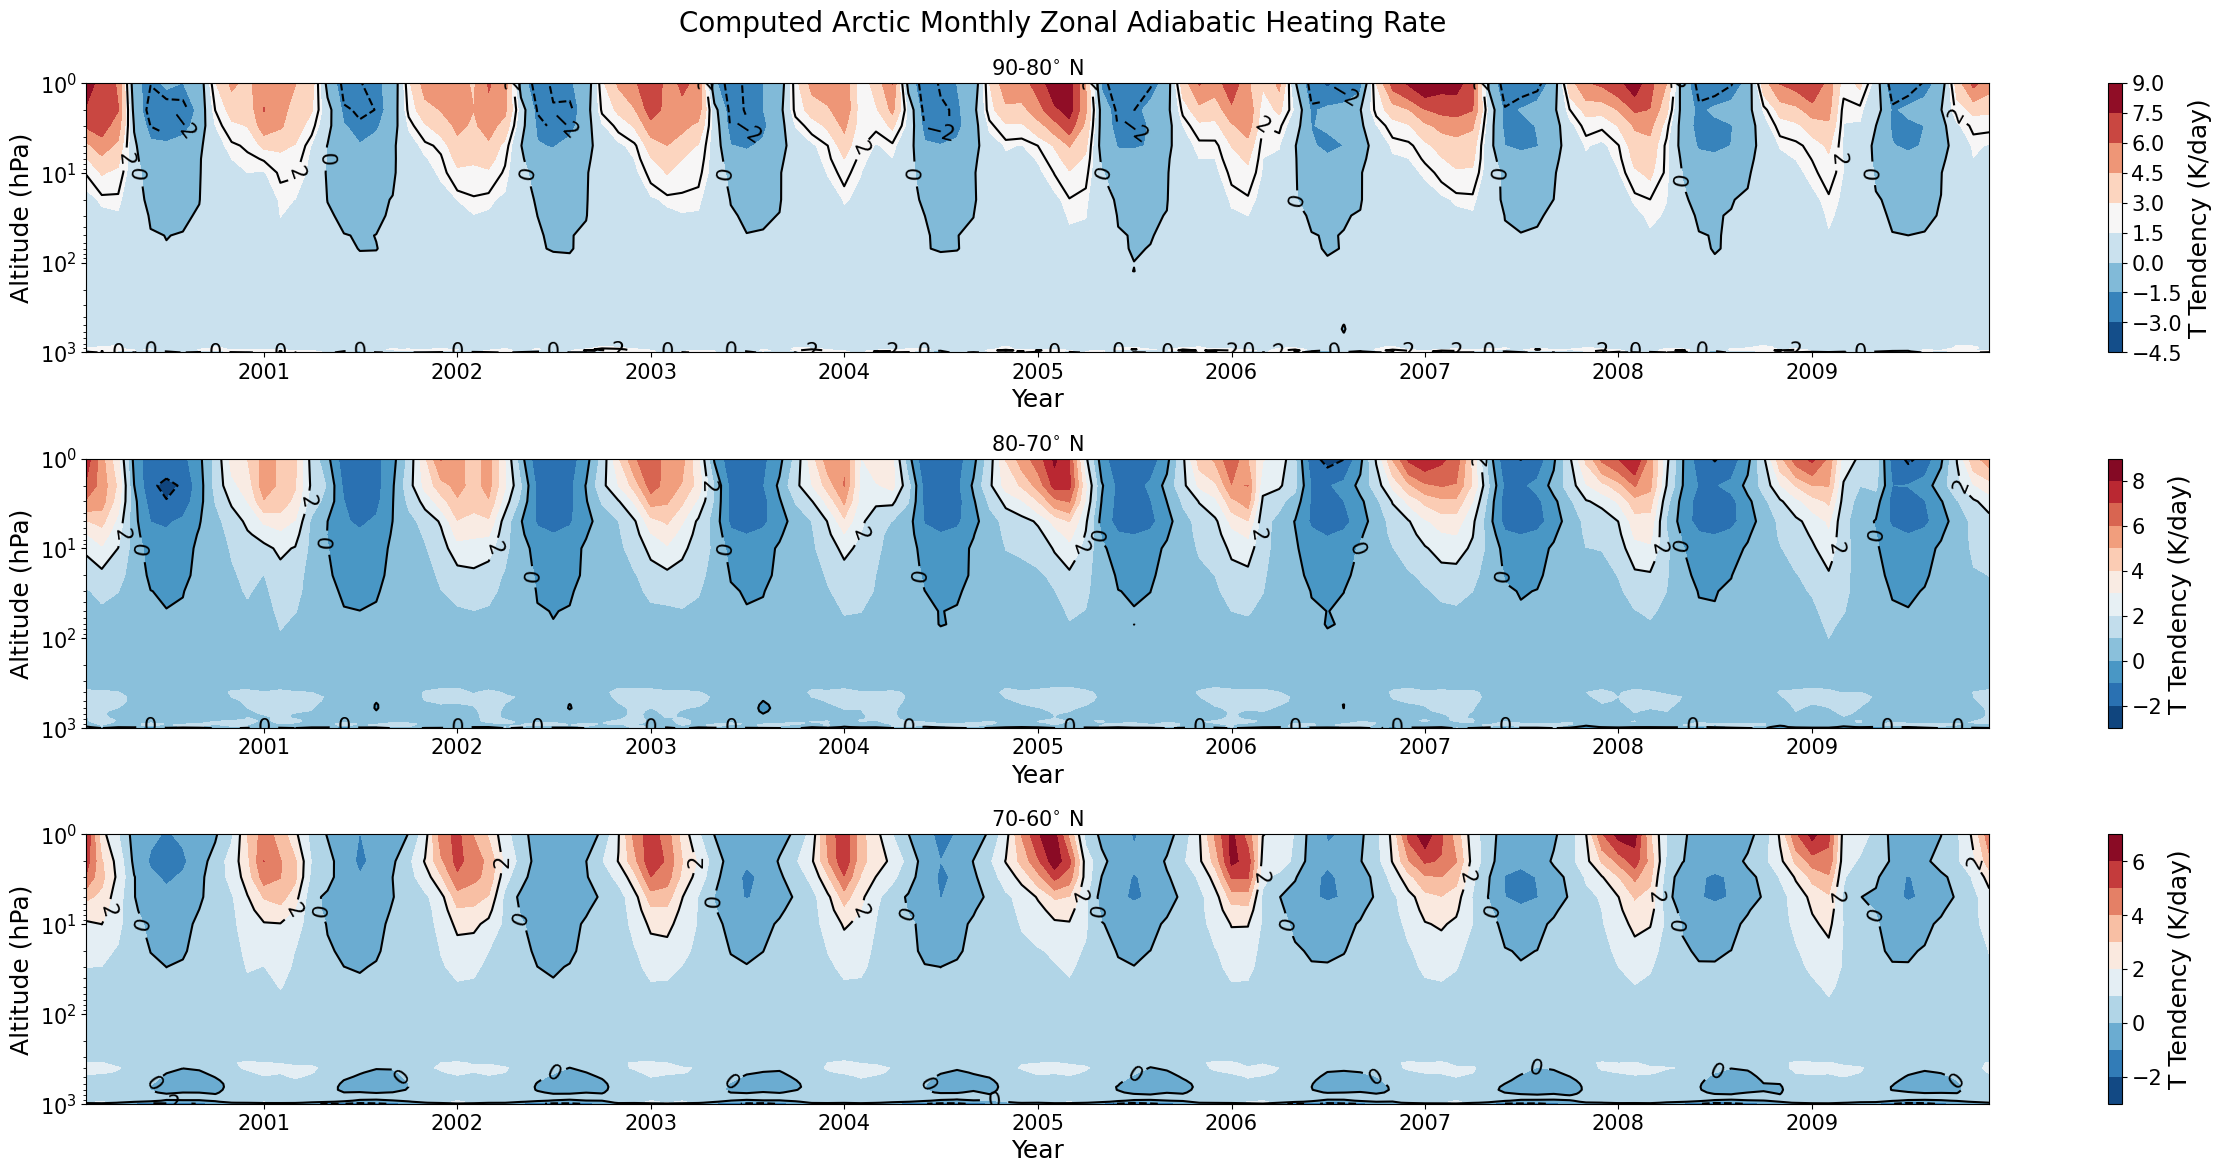

In [8]:
fig, ax =  plt.subplots(3, 1, figsize=(25,12))

H_oga = np.array(H_og)

fig.suptitle('Computed Arctic Monthly Zonal Adiabatic Heating Rate', x=0.43)
for i in range(3):
    cs = ax[i].contourf(H[i]['time'][:119], H[i]['level'], H_oga[i].T-H[i].transpose('level', 'time')[:,:119], cmap='RdBu_r', levels = 10)
    cs2 = ax[i].contour(H[i]['time'][:119], H[i]['level'], H_oga[i].T-H[i].transpose('level', 'time')[:,:119], levels=[-2,0,2], colors='black', linewidths=1.5)
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='T Tendency (K/day)', ax=ax[i])
    ax[i].clabel(cs2)
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_htr_adia_decadal.png', bbox_inches='tight')

In [9]:
H_oga[0].T.shape

(37, 119)

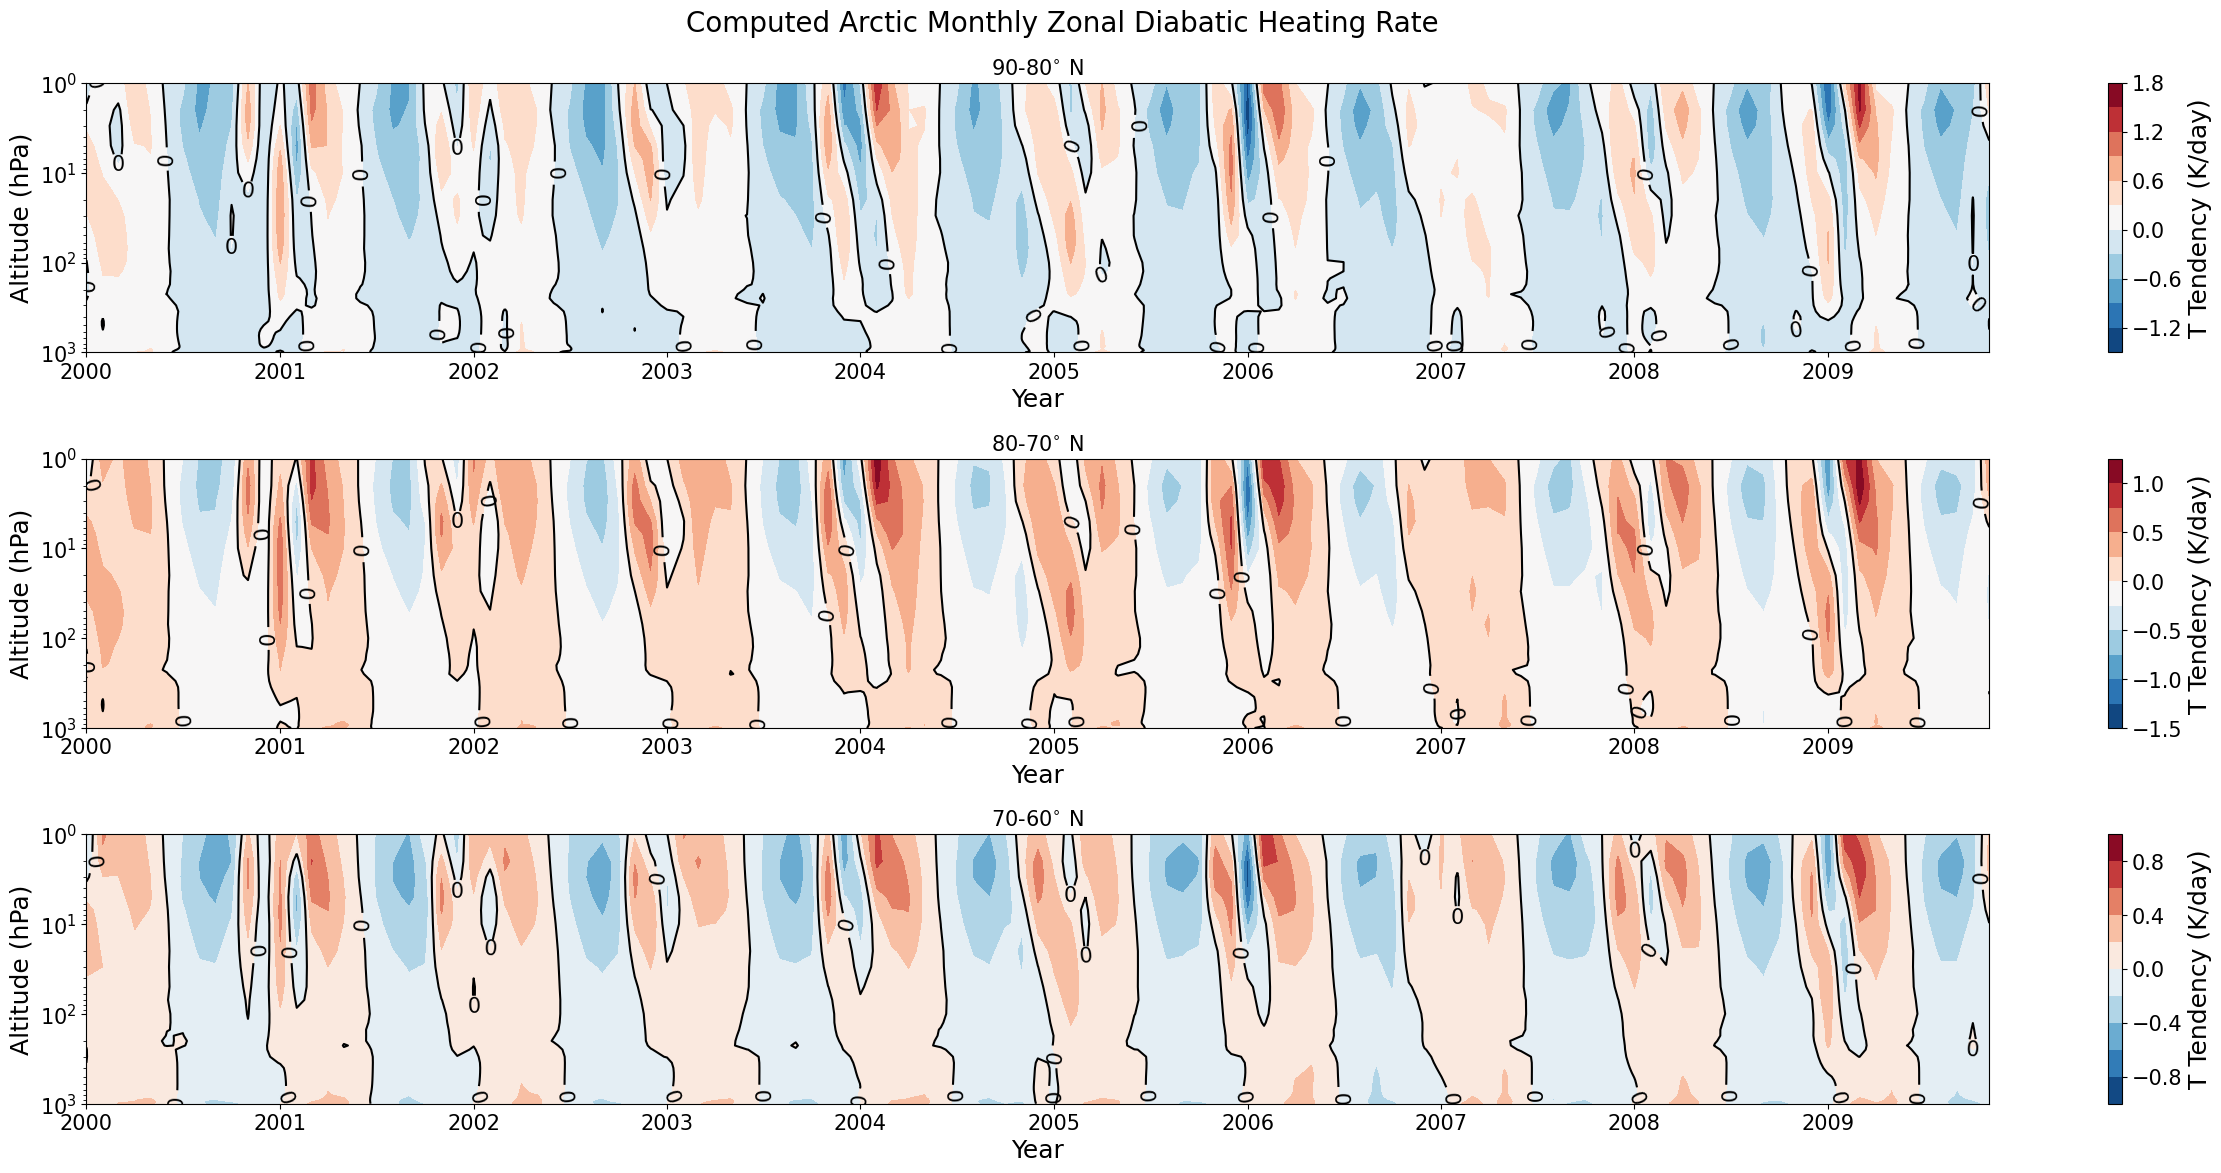

In [10]:
fig, ax =  plt.subplots(3, 1, figsize=(25,12))


fig.suptitle('Computed Arctic Monthly Zonal Diabatic Heating Rate', x=0.43)
for i in range(3):
    cs = ax[i].contourf(T[i]['month_period'][:119], T[i]['level'], H_oga[i].T, cmap='RdBu_r', levels = 10)
    cs2 = ax[i].contour(T[i]['month_period'][:119], T[i]['level'], H_oga[i].T, levels=[0], colors='black', linewidths=1.5)
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='T Tendency (K/day)', ax=ax[i])
    ax[i].clabel(cs2)
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_htr_comp_decadal.png', bbox_inches='tight')

In [11]:
Hsw = []
Hlw = []
for i in range(3):
    Hsw.append(xr.open_dataset('ERA5/htrsw_inp'+str(90-10*i)+'.nc')['avg_ttswr']*86400)
    Hlw.append(xr.open_dataset('ERA5/htrlw_inp'+str(90-10*i)+'.nc')['avg_ttlwr']*86400)

In [ ]:
fig, ax =  plt.subplots(3, 1, figsize=(25, 12))

fig.suptitle('Arctic Monthly Zonal Mean Shortwave Heating Rate', x=0.43)
for i in range(3):
    cs = ax[i].contourf(Hsw[i]['time'], Hsw[i]['level'], Hsw[i].transpose('level', 'time'), cmap='RdBu_r', levels = 10)
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='Shortwave htr (K/day)', ax=ax[i])
    # ax[i].set_ylim(1,1000)
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_htrsw_decadal.png')
plt.close()

In [13]:
fig, ax =  plt.subplots(3, 1, figsize=(25, 12))

fig.suptitle('Arctic Monthly Zonal Mean Longwave Heating Rate', x=0.43)
for i in range(3):
    cs = ax[i].contourf(Hlw[i]['time'], Hlw[i]['level'], Hlw[i].transpose('level', 'time'), cmap='RdBu_r', levels = 10)
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='Longwave Htr (K/day)', ax=ax[i])
    # ax[i].set_ylim(1,1000)
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_htrlw_decadal.png')
plt.close()

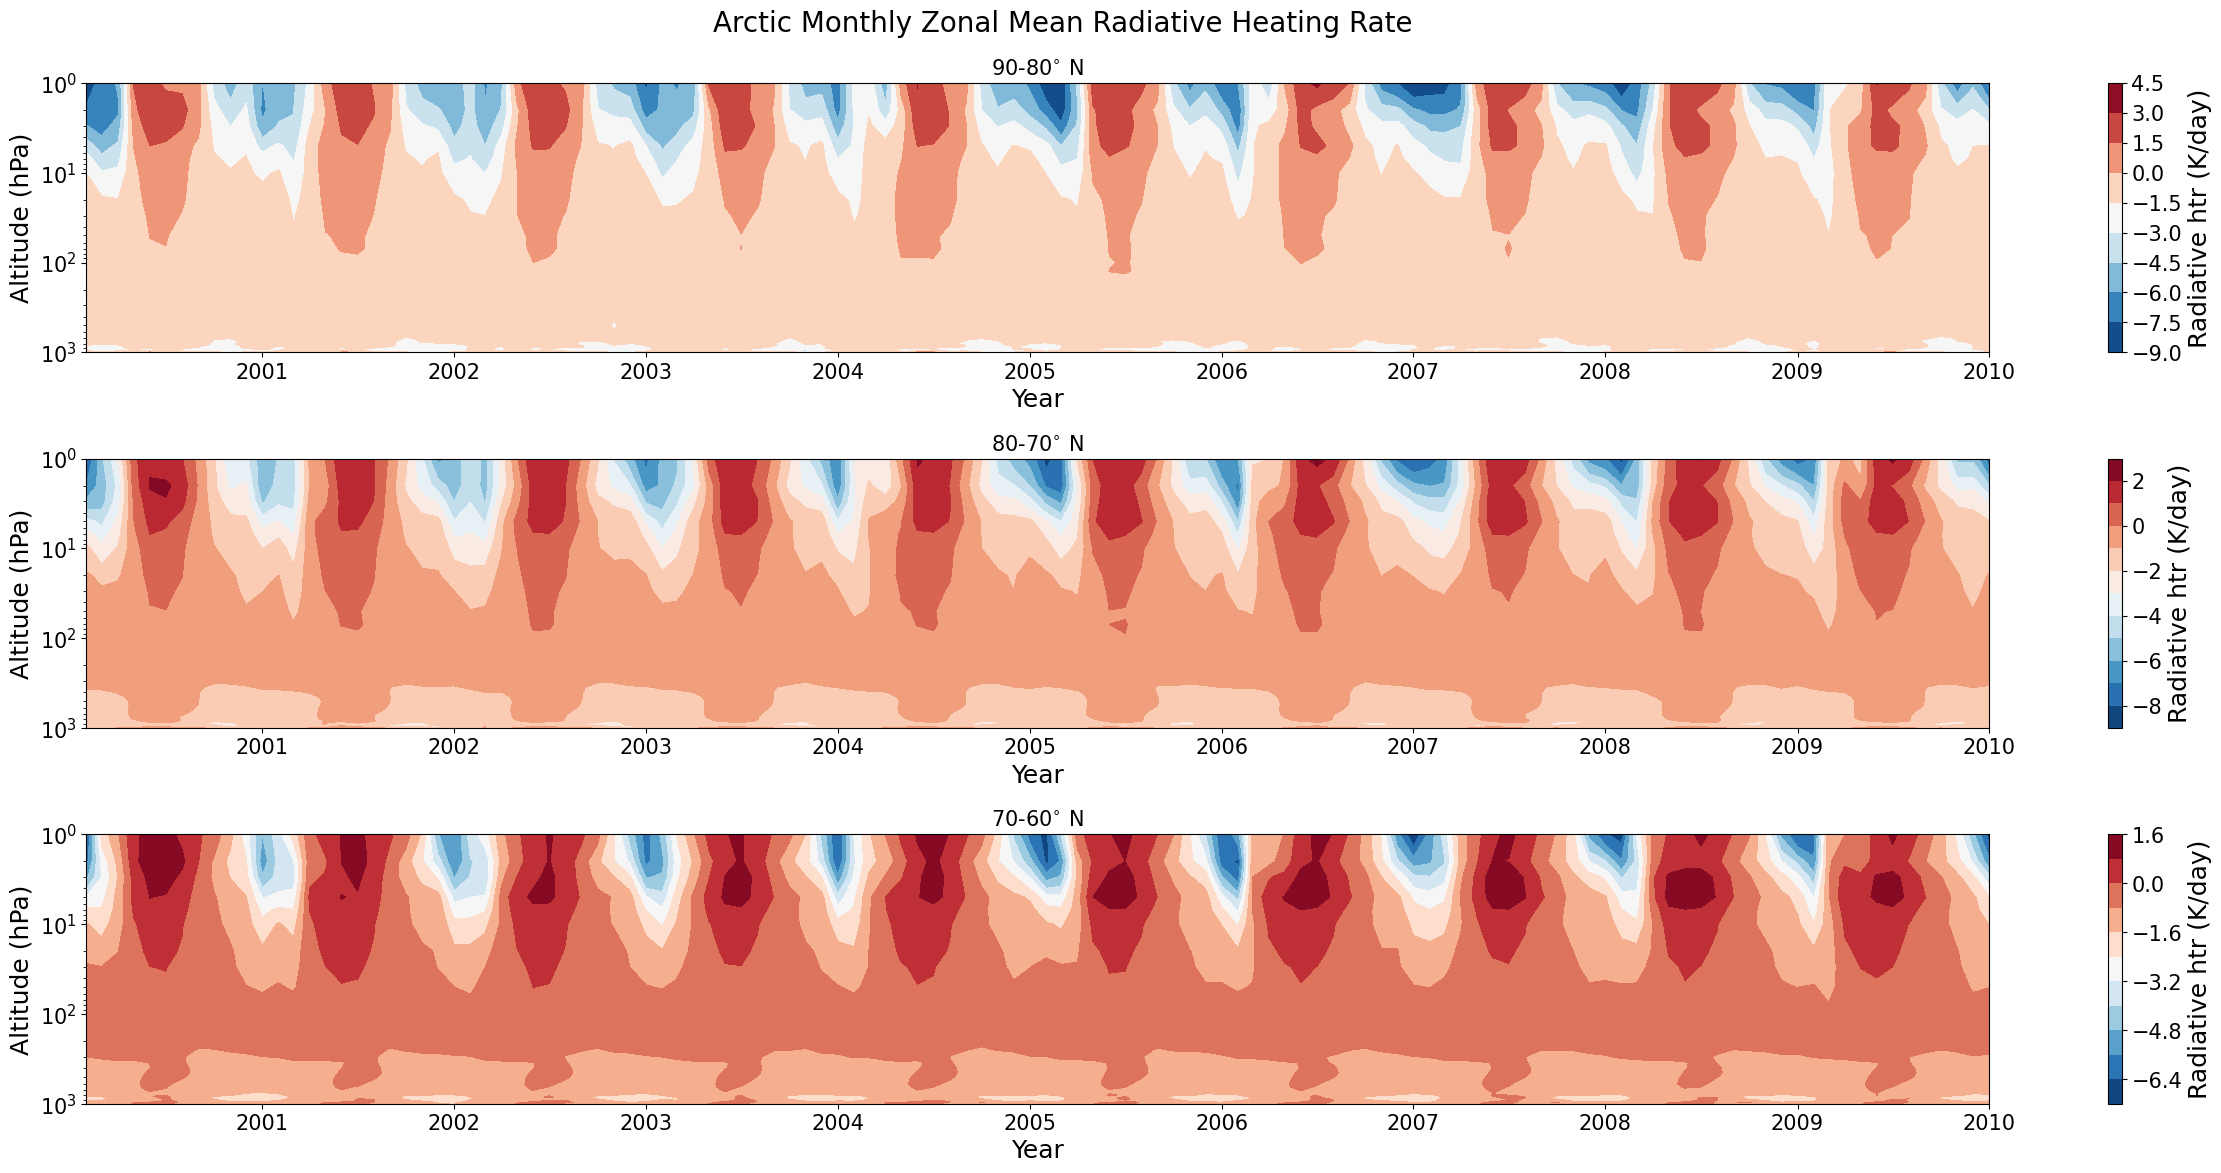

In [14]:
fig, ax =  plt.subplots(3, 1, figsize=(25,12))

fig.suptitle('Arctic Monthly Zonal Mean Radiative Heating Rate', x=0.43)
for i in range(3):
    temp = Hsw[i]+Hlw[i]
    cs = ax[i].contourf(temp['time'], temp['level'], temp.transpose('level', 'time'), cmap='RdBu_r', levels = 10)
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='Radiative htr (K/day)', ax=ax[i])
    # ax[i].set_ylim(1,1000)
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_htrrad_decadal.png', bbox_inches='tight')

In [15]:
Hswcs = []
Hlwcs = []
for i in range(3):
    Hswcs.append(xr.open_dataset('ERA5/htrswcs_inp'+str(90-10*i)+'.nc')['avg_ttswrcs']*86400)
    Hlwcs.append(xr.open_dataset('ERA5/htrlwcs_inp'+str(90-10*i)+'.nc')['avg_ttlwrcs']*86400)

In [16]:
fig, ax =  plt.subplots(3, 1, figsize=(25, 12))

fig.suptitle('Arctic Monthly Zonal Mean Shortwave Cloud/Aerosol Heating Rate', x=0.43)
for i in range(3):
    cs = ax[i].contourf(Hswcs[i]['time'], Hswcs[i]['level'], Hsw[i].transpose('level', 'time')-Hswcs[i].transpose('level', 'time'), cmap='RdBu_r', levels = 10)
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='Shortwave htr (K/day)', ax=ax[i])
    # ax[i].set_ylim(1,1000)
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_htrswcld_decadal.png')
plt.close()

In [17]:
fig, ax =  plt.subplots(3, 1, figsize=(25, 12))

fig.suptitle('Arctic Monthly Zonal Mean Radiative Cloud/Aerosol Heating Rate', x=0.43)
for i in range(3):
    cs = ax[i].contourf(Hlwcs[i]['time'], Hlwcs[i]['level'], Hlw[i].transpose('level', 'time')-Hlwcs[i].transpose('level', 'time'), cmap='RdBu_r', levels = 10)
    # ax[i].set_yscale('log')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='Longwave htr (K/day)', ax=ax[i])
    # ax[i].set_ylim(1,1000)
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_htrlwcld_decadal.png')
plt.close()

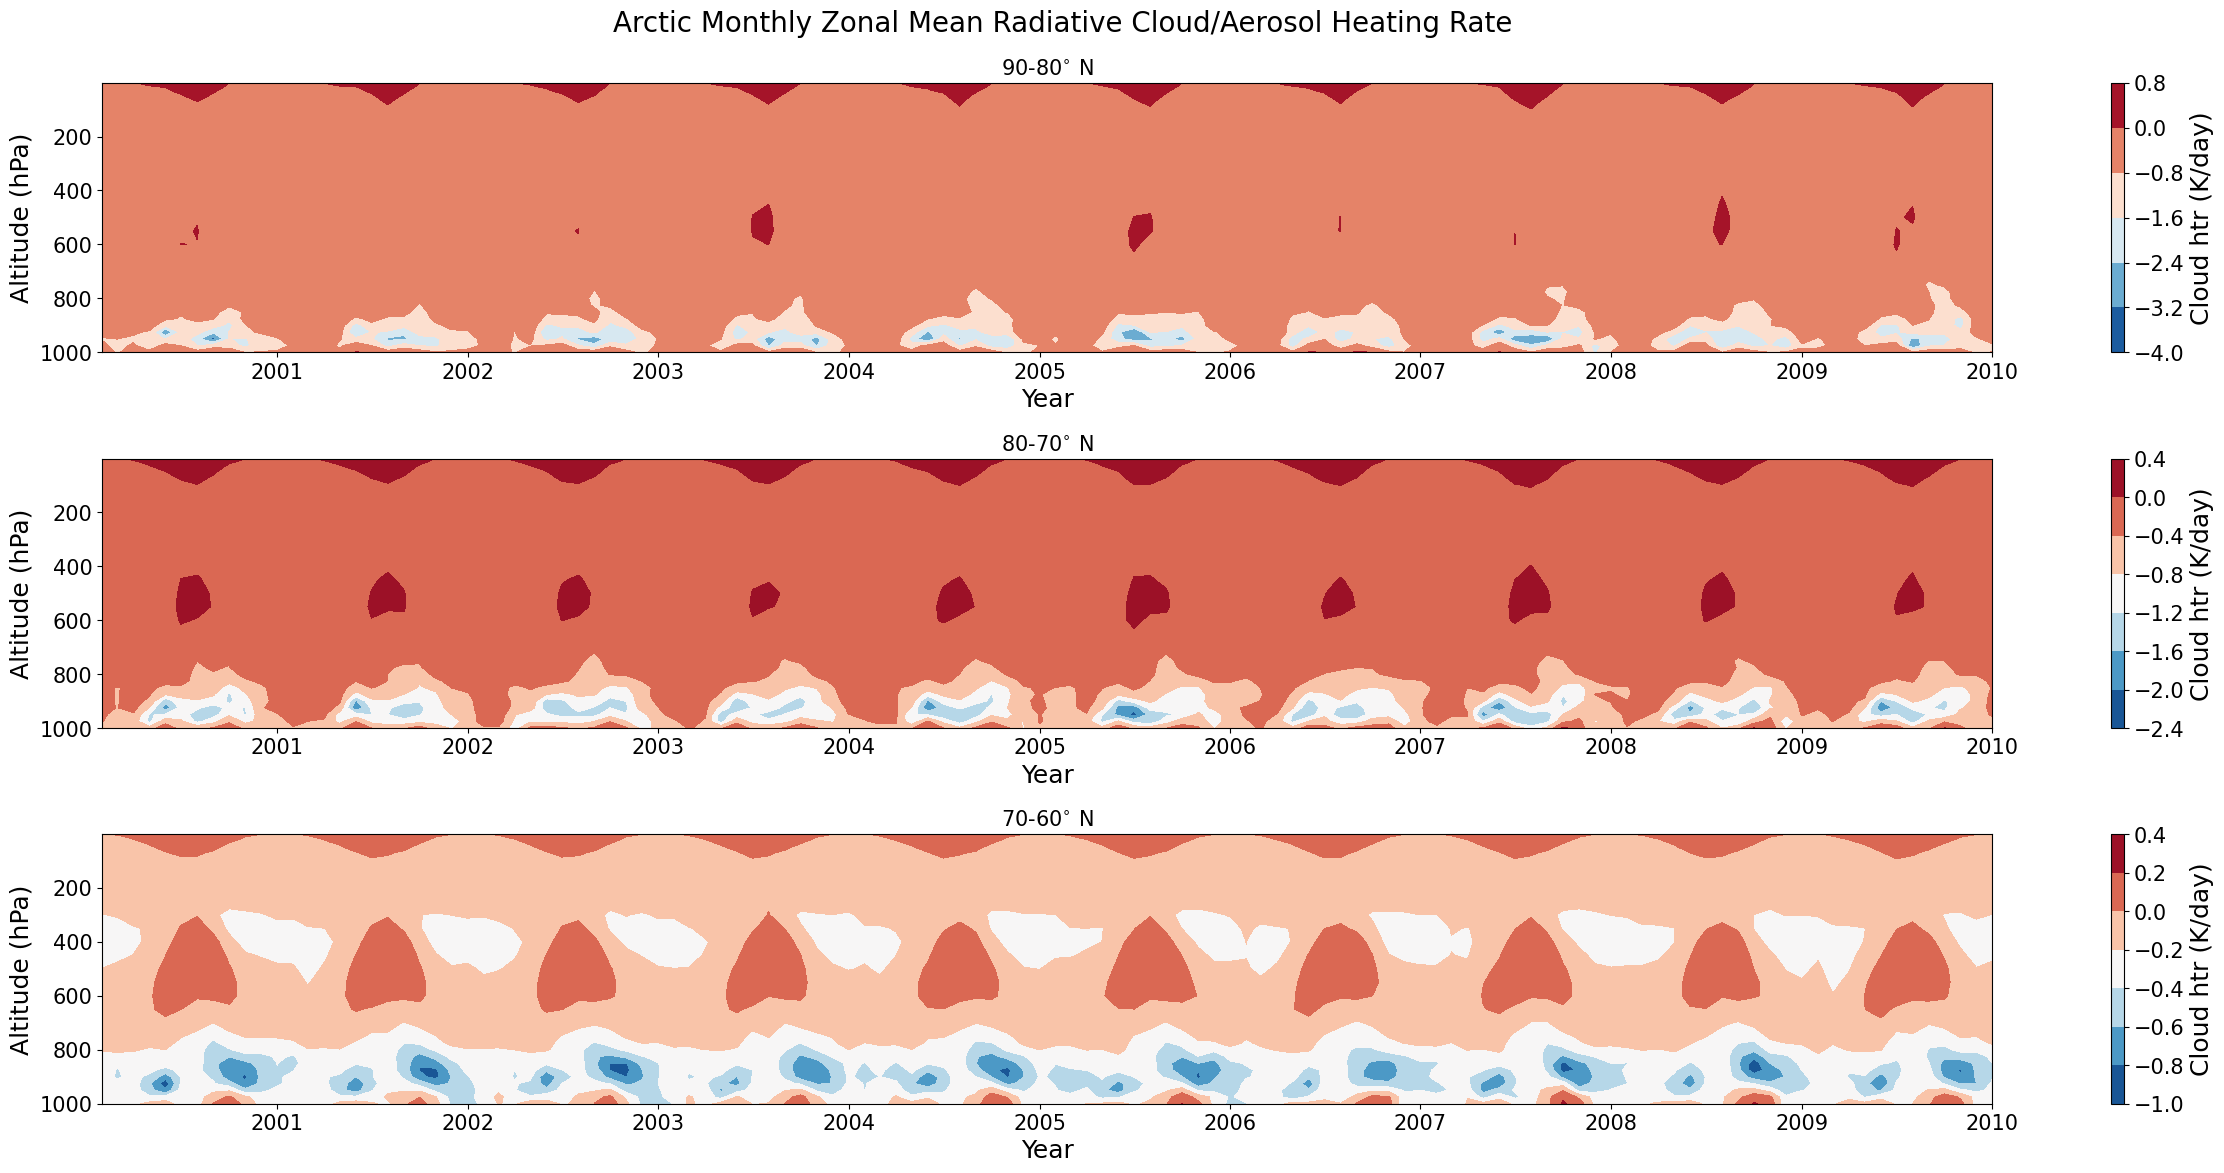

In [20]:
fig, ax =  plt.subplots(3, 1, figsize=(25, 12))

fig.suptitle('Arctic Monthly Zonal Mean Radiative Cloud/Aerosol Heating Rate', x=0.43)
for i in range(3):
    cs = ax[i].contourf(Hlwcs[i]['time'], Hlwcs[i]['level'], Hsw[i].transpose('level', 'time')-Hswcs[i].transpose('level', 'time')+Hlw[i].transpose('level', 'time')-Hlwcs[i].transpose('level', 'time'), cmap='RdBu_r', levels = 5)
    # ax[i].set_yscale('log')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='Cloud htr (K/day)', ax=ax[i])
    # ax[i].set_ylim(1,1000)
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_htrradcld_decadal.png', bbox_inches='tight')